# Mini Project #1: Baseball Analytics

The overall purpose of this mini-project is to predicting MLB wins per season by modeling data to KMeans clustering model and linear regression models.

## Part 3: Analysis/Modeling

In this part of the project, you are going to conduct actual analysis on the data your just processed in Part 1 & 2. The tasks in the part include:
- K-means Clustering: pre-modeling part that provides insights toward the data;
- Linear Regression: predict Wins (continuous) using trained linear regression model;
- Logistic Regression: predict Win_bins (categorical) using trained logistic regression model __on your own__.

Let's get started.

In [1]:
# import dependencies
import pandas as pd
import numpy as np

In [2]:
# read-in required data
# features for analysis
data_features = pd.read_csv('../../ba545-data/baseball_analytics_features.csv', header=0, index_col=0)

# continuous target `wins`
wins = pd.read_csv('../../ba545-data/baseball_analytics_wins.csv',  index_col=0, names = ['wins'])

# categorical target `Win_bins`
Win_bins = pd.read_csv('../../ba545-data/baseball_analytics_target.csv',  index_col=0, names = ['Win_bins'])

# display if data are read correctly
print(data_features.head())
print(wins.head())
print(Win_bins.head())

     G    R    AB     H   2B  3B   HR   BB      SO   SB    ...     era_1950  \
0  162  744  5424  1331  218  22  189  681  1068.0   37    ...            0   
1  162  718  5499  1377  232  35  137  602   917.0   46    ...            0   
2  161  597  5506  1378  208  38   95  448   916.0   43    ...            0   
3  162  544  5362  1297  186  27  102  472   920.0   49    ...            0   
4  162  527  5354  1279  200  36   92  443   973.0  107    ...            0   

   era_1960  era_1970  era_1980  era_1990  era_2000  era_2010  R_per_game  \
0         1         0         0         0         0         0    4.592593   
1         1         0         0         0         0         0    4.432099   
2         1         0         0         0         0         0    3.708075   
3         1         0         0         0         0         0    3.358025   
4         1         0         0         0         0         0    3.253086   

   RA_per_game       rpg  
0     4.839506  4.525175  
1     4.

### K-means Clustering

K-means clustering, as a basic clustering technique, can capture internal relationship(s) between your data points. Sometimes we use (k-means) clustering as a pre-modeling step for supervised learning: essentially, we can use k-means clsutering to capture the internal relationship of the features, and then capture the relationship in an additional feature that being used as an input to a classification/regression model.

One key step in k-means clustering is to determine the value of `k` - how many clusters? If we want to use the clustering results as an additional (categorical) feature, we should not have a higher value of `k`. Also, increasing value of `k` may increase the erroneous relationship being captured. The k-means model is provided in `sklearn.clustering`.

In this tutorial, we use **Grid Search** to find the best value of `k`. To conduct Grid Search, you need a range of `k` and a metric that measures the performance under each value of `k`. In this context, we select the metric as the [**silhouette score**](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) (`s_score`), which is provided in `sklearn.metrics`.

In [3]:
# import dependencies
from sklearn.cluster import KMeans
from sklearn import metrics

Silhouette score is a visualized way of measuring the performance of clustering. Thus, we need to import `matplotlib` to visualize the clustering.

In [4]:
# import and initialize matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

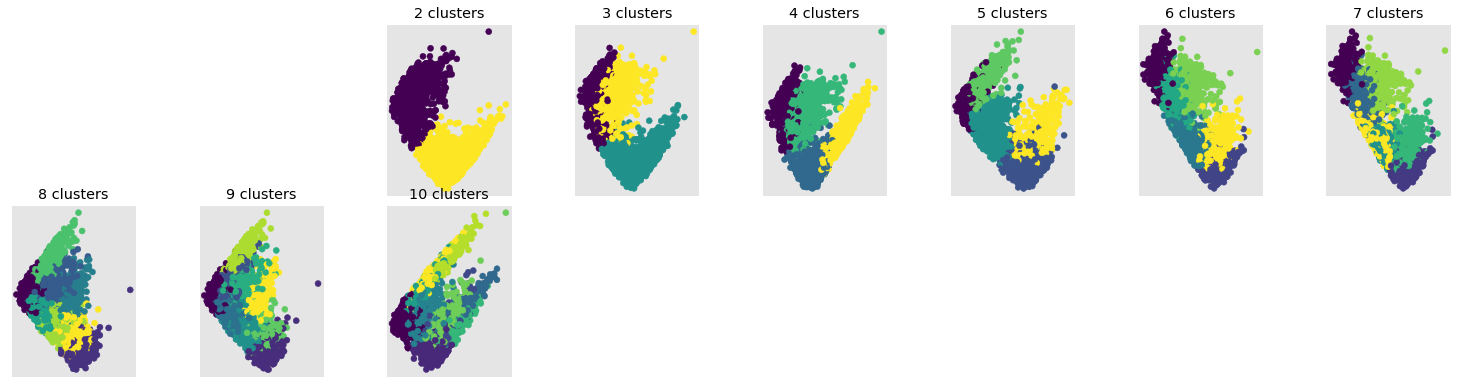

In [5]:
# We need to create a figure that contains different value of `k` as sub-figures
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.5)

#### complete your code below
#### create an empty dictionary `s_score_dict` that we will use to store silhouette scores
#### for different `k` values; use different `k` values as keys, and corresponding
#### silhouette score as values
s_score_dict = {}


#### now we create a for-loop go through a range of `k` values in [2, 11]
for i in range(2,11):
    #### add a sub-figure `ax` to `fig` using `.add_subplot(8,8,i+1,xticks=[],yticks=[])`
    fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    # conduct the k-means clustering using `k = i`
    km = KMeans(n_clusters=i, random_state=2019)
    # any clustering model needs a distance metric, in this case, `distance` is the distance between
    # any pair of data points
    distances = km.fit_transform(data_features)
    # clustering models will generate `labels` - if you want to create the additional feature 
    # as discussed above, you will use `labels` as its values
    labels = km.labels_
    # you will then applied the fitted `km` model to `data_faetures`
    l= km.fit_predict(data_features)
    # Silhouette score is computed between `data_features` and `l`
    s_s= metrics.silhouette_score(data_features, l)
    #### update the `s_score_dict` using `i` as key and `s_s` as value
    s_score_dict.update({i : s_s})
    # we will plot the clusters out using scatter plot
    plt.scatter(distances[:,0], distances[:,1], c=labels)
    #### add 'i clusters' as the title of each sub-figure
    title = str(i)
    plt.title(title + ' clusters')
    
#### show plot
plt.show()

Visually, we know that 2-clusters looks the best. Let's double check the silhouette score to make sure.

In [6]:
s_score_dict

{2: 0.39070077846349777,
 3: 0.3386571588556883,
 4: 0.25344426469637676,
 5: 0.23576545516391118,
 6: 0.21364560382382403,
 7: 0.19583510661411763,
 8: 0.18442864325552202,
 9: 0.1759084254584811,
 10: 0.17187910654005373}

As observed in the figure, 2-cluster model returns the highest silhouette score. 

__Rule of thumb__: However, we normally start searching for `k` value at `3`.

So we are going to build a k-means model of `k=3`, and then add the `cluster_label` as a feature.

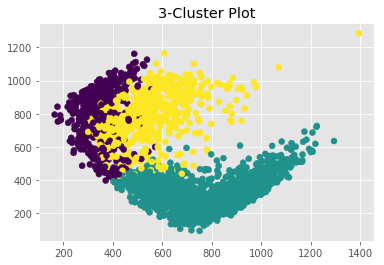

In [7]:
#### complete your code below
#### create a model called `kmeans_model` with `n_clusters = 3` and `random_state = 2019`
kmeans_model = KMeans(n_clusters=3, random_state=2019)

#### capture `distances` by fit (`fit_transform`) `kmeans_model` to `data_features`
distances = kmeans_model.fit_transform(data_features)

#### record labels of clusters in `labels`
labels = kmeans_model.labels_

#### create a scatter plot (plt.scatter()) to plot the clusters
plt.scatter(distances[:,0], distances[:,1], c=labels)

#### add title to plot as `3-cluster plot`
plt.title('3-Cluster Plot')

#### show the plot
plt.show()

Looks pretty good, correct? Now let's add the `labels` to `data_features` as an additional feature so that we can use it in further analysis.

In [8]:
# look at `labels`
print(labels)
print(len(labels))
print(data_features.shape[0])

[1 1 1 ... 1 1 1]
2265
2265


In [9]:
#### complete your code below
#### add `labels` to `data_features`
#### add `labels` as a column in `data_features` namely `label`
data_features['label'] = labels

#### double check by looking at the first 5 rows of `data_features`
data_features.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,era_1960,era_1970,era_1980,era_1990,era_2000,era_2010,R_per_game,RA_per_game,rpg,label
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,1,0,0,0,0,0,4.592593,4.839506,4.525175,1
1,162,718,5499,1377,232,35,137,602,917.0,46,...,1,0,0,0,0,0,4.432099,4.358025,4.460518,1
2,161,597,5506,1378,208,38,95,448,916.0,43,...,1,0,0,0,0,0,3.708075,4.099379,3.946881,1
3,162,544,5362,1297,186,27,102,472,920.0,49,...,1,0,0,0,0,0,3.358025,3.401235,4.035670,1
4,162,527,5354,1279,200,36,92,443,973.0,107,...,1,0,0,0,0,0,3.253086,3.512346,3.988293,1


### Linear Regression

We will train linear regression models to predict a continuous target `wins`.

In [10]:
#### complete your code below
#### first we need to create the dataset we will use for the regression model
#### `reg_data` = `data_features` + `wins`

# create variable 'reg_data' that holds all the information from data_features
reg_data = data_features

# make a new column 'wins' in reg_data and have it contain all the infomation from the wins variable
reg_data['wins'] = wins

#### double check by looking at the first 5 rows of `reg_data`
reg_data.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,era_1970,era_1980,era_1990,era_2000,era_2010,R_per_game,RA_per_game,rpg,label,wins
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,0,0,0,0,0,4.592593,4.839506,4.525175,1,70
1,162,718,5499,1377,232,35,137,602,917.0,46,...,0,0,0,0,0,4.432099,4.358025,4.460518,1,86
2,161,597,5506,1378,208,38,95,448,916.0,43,...,0,0,0,0,0,3.708075,4.099379,3.946881,1,70
3,162,544,5362,1297,186,27,102,472,920.0,49,...,0,0,0,0,0,3.358025,3.401235,4.035670,1,82
4,162,527,5354,1279,200,36,92,443,973.0,107,...,0,0,0,0,0,3.253086,3.512346,3.988293,1,75


In [11]:
#### complete your code below
#### investigate descriptive stats using describe()
reg_data.describe()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,era_1970,era_1980,era_1990,era_2000,era_2010,R_per_game,RA_per_game,rpg,label,wins
count,2265.000000,2265.00000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,...,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000
mean,159.010155,699.28521,5415.782340,1414.788962,245.046799,44.397792,118.361148,513.631788,834.424724,98.186755,...,0.108609,0.103311,0.098013,0.132450,0.092715,4.398085,4.397847,4.398195,1.063135,79.211479
std,3.741585,102.29043,171.911625,106.173052,45.564428,19.605096,55.661793,83.964601,248.585233,50.999021,...,0.311217,0.304432,0.297398,0.339055,0.290097,0.641416,0.651584,0.409479,0.647082,13.020365
min,150.000000,371.00000,4768.000000,1044.000000,110.000000,6.000000,3.000000,282.000000,308.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.409091,2.458065,3.385450,0.000000,36.000000
25%,155.000000,633.00000,5301.000000,1348.000000,213.000000,30.000000,80.000000,457.000000,617.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.975155,3.956790,4.132241,1.000000,70.000000
50%,162.000000,696.00000,5458.000000,1412.000000,246.000000,39.000000,123.000000,511.000000,855.000000,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.382716,4.358025,4.383279,1.000000,80.000000
75%,162.000000,762.00000,5539.000000,1487.000000,278.000000,55.000000,159.000000,568.000000,1015.000000,126.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.783951,4.797546,4.727984,1.000000,89.000000
max,165.000000,1067.00000,5781.000000,1783.000000,376.000000,129.000000,264.000000,835.000000,1543.000000,347.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.896104,7.685897,5.549028,2.000000,116.000000


Let's import the dependencies for building and evaluation a linear regression model.

In [12]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

Then let's define the features and target. There are two ways of doing this. Let's try the first.

In [13]:
#### complete your code below
#### create a variable `reg_values` which are the values in `reg_data`
reg_values = reg_data.values

#### create a variable `X` which contains all columns in `reg_values` besides the last 
X = reg_values[:,:-1]

#### create a variable `y` which contains the last column in `reg_values`
y = reg_values[:,-1]

Here is an alternative method:

In [14]:
#### complete your code below
#### create a variable `Xa` which contains all values in `data_features`
Xa = data_features.values

#### create a variable `ya` which contains values in `wins`
ya = wins.values

Now we need to split our data into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`).

In [15]:
#### complete your code below
#### import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

#### split X, y into training and testing, using 75/25 split, and set `random_state = 2019`
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=2019)

In [16]:
# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
# calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

# Print `mae`
print(mae)

2.7803023490270484


You can print your linear regression model.

In [18]:
lr.coef_

array([-6.06926694e-01,  7.96206941e-02, -3.34264523e-02,  2.46692569e-02,
        3.85176590e-03,  1.03632859e-03,  2.45773753e-03, -6.03920503e-03,
        2.46822394e-04, -3.31703306e-03,  7.98005007e-02, -1.05469012e-01,
        1.64268755e+01,  1.08137794e-01,  1.60894154e-01,  3.04038545e-01,
        6.29859873e-02, -6.97906306e-03, -8.05612999e-03, -7.45267261e-03,
        1.37874385e-03, -4.58157835e-02,  4.49390163e-03, -2.18231892e+02,
       -2.44798893e+00, -1.43060117e+00,  1.32151992e+00,  2.58079083e+00,
        9.79185877e-01,  4.63598209e-01,  3.52010762e-01, -1.73214575e-01,
       -7.54705968e-01, -1.10656309e-01,  4.60391180e-01,  1.56054276e+00,
       -2.20254225e+01,  7.88415696e-01,  3.98490240e-01])

In [19]:
lr.intercept_

248.65982443275894

We can try to train an advanced regression model to see if there is any improvement in results.

In [20]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(X_train, y_train)
predictions_rrm = rrm.predict(X_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

2.810678272164131


We can also see how much contribution the `label` feature provides to the regression model.

In [21]:
#### Complete your code below
#### create a variable `Xb` without `label`
#### you can do it by getting X[:,:-1]
Xb = X[:,:-1]

#### create your training and testing data using Xb and y
#### remember that Xb does not contain 'label', use the same parameters as before
#### 75/25 split, and `random_state = 2019`
X_train, X_test, y_train, y_test= train_test_split(Xb,y, test_size=0.25, random_state=2019)

#### Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### calculate the MAE
MAE = mean_absolute_error(y_test, y_pred)

#### Print `mae`
print(MAE)

2.7779226910566797


### Question: 
__Do you observe an improvement or not while excluding `label` in the analysis? In other words, does `label` help with the analysis? Answer in the next block__.

There is a very small decrease in MAE when excluding labels from the model.

### Logistic Regression

You will need to create a logistic regression model __on your own__, using `data_features` as features, and `win_bins` as the target.

If you have any question, refer to the logistic regression notebook for more help.

In [22]:
# import Logistic Regression Packages 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [23]:
# define X and Y variables
X = data_features.values
Y = Win_bins.values

In [24]:
# look at the variables in data_features 
## note that 'wins' is still included - must remove this becaues 'win_bins' is derived from 'wins'
data_features.columns

Index(['G', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E',
       'DP', 'FP', 'era_1910', 'era_1920', 'era_1930', 'era_1940', 'era_1950',
       'era_1960', 'era_1970', 'era_1980', 'era_1990', 'era_2000', 'era_2010',
       'R_per_game', 'RA_per_game', 'rpg', 'label', 'wins'],
      dtype='object')

In [25]:
# drop the 'wins' column from X as per explanation above 
# if we include 'wins' our model will give us really high accuracy scores but they will be very inaccurate
X = X[:,:-1]

In [26]:
# split the data using the same train_test_split used in Linear Regression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2019)

In [27]:
# initiate the logistic regression function 
logreg = LogisticRegression()

# pass the training data into the model. This training data includes all of the independent variables 
logreg.fit(X_train,Y_train) 

# tell the model what to predict, or in this case classify, and what variables to use to predict the dependent variable 
y_pred=logreg.predict(X_test)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[  1,   1,   0,   0,   0],
       [  1,  97,  25,   0,   0],
       [  0,  19, 272,  13,   0],
       [  0,   0,  39,  98,   0],
       [  0,   0,   0,   1,   0]])

Text(0.5, 257.44, 'Predicted label')

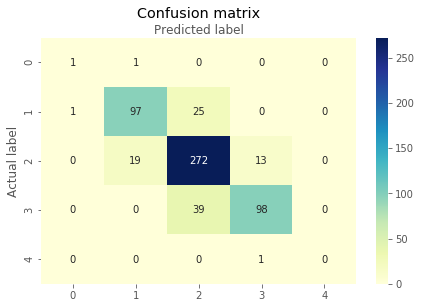

In [29]:
# names of the classes 
class_names=[0,1,2,3,4]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
# calculate the accuracy of the model
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8253968253968254


In [31]:
#calcualte MAE 
MAE = mean_absolute_error(Y_test, y_pred)
print(MAE)

0.1746031746031746
